# Boosting Techniques

Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

**Answer:**
Boosting is an **ensemble learning technique** in machine learning where multiple **weak learners** (usually decision trees with shallow depth) are combined to create a **strong learner**.

A *weak learner* is a model that performs only slightly better than random guessing. Boosting improves these weak learners by training them **sequentially**, not independently.

Here’s how it works:

1. The first weak learner is trained on the full dataset.
2. The algorithm then **checks which samples were misclassified** and gives those samples **higher weights**.
3. The next weak learner focuses more on these hard-to-classify samples.
4. This process continues, and each new model corrects the mistakes of the previous one.
5. Finally, all weak learners are combined (usually by weighted voting or averaging) to form one strong model with much higher accuracy.

Because each model **learns from the errors** of the earlier ones, boosting reduces bias and significantly improves overall performance.



Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

 **Answer:**
The main difference between **AdaBoost** and **Gradient Boosting** is how they train their next weak learner.

**AdaBoost** increases the **weights of wrongly classified samples** after each iteration. This means the next model focuses more on the difficult points that previous models got wrong. It tries to reduce weighted classification error.

**Gradient Boosting**, on the other hand, trains each new model on the **residuals (errors)** of the previous model. Instead of changing sample weights, it uses **gradient descent** to minimize a loss function by correcting the previous model’s mistakes step by step.

**In short:**

* **AdaBoost:** Fix mistakes by changing *sample weights*.
* **Gradient Boosting:** Fix mistakes by modeling *residuals* using gradient descent.


Question 3: How does regularization help in XGBoost?


**Answer: How regularization helps in XGBoost**

Regularization in XGBoost (L1 and L2) helps **control the complexity of the trees**, preventing the model from becoming too large or too deep. It penalizes overly complex trees with too many leaves or large leaf weights.

Because of this:

* The model avoids **overfitting**
* It becomes **more generalizable** to new data
* It encourages **simpler, more stable trees**

**In simple words:**
Regularization in XGBoost makes the model more balanced by preventing it from learning too much noise from the training data.


Question 4: Why is CatBoost considered efficient for handling categorical data?


**Answer: **
CatBoost is efficient for categorical data because it **automatically converts categorical features into numeric values using Target-based encoding**, but in a safe way that avoids target leakage. It uses a special technique called **Ordered Encoding**, which processes data in a specific order so the model never sees the target value of the current sample.

It also uses **built-in handling** of categorical features, so we don’t need manual encoding like one-hot or label encoding. This reduces preprocessing, avoids expanding the dataset, and improves accuracy.

**In simple words:**
CatBoost is efficient because it directly understands categorical variables and converts them smartly, making training faster and reducing errors.


Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Datasets:

● Use sklearn.datasets.load_breast_cancer() for classification tasks.

● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

**Answer:**

Boosting techniques (like AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost) are preferred in situations where **high accuracy, strong feature interaction handling, and performance on complex patterns** are required. Unlike Bagging—which reduces variance—Boosting focuses on **reducing bias** and correcting mistakes made by earlier models. This makes Boosting more suitable for difficult, noise-free, and highly imbalanced problems.

#### **Real-World Applications of Boosting**

1. **Fraud Detection (Banking & Finance)**
   Boosting models perform extremely well on fraud detection because they focus on **misclassified cases**, which is crucial when fraudulent transactions are rare but important.

2. **Customer Churn Prediction (Telecom & SaaS)**
   Boosting can pick up subtle patterns in user behavior and interactions, giving higher accuracy than bagging methods.

3. **Medical Diagnosis (Classification)**
   For datasets like *breast cancer classification*, Boosting often outperforms bagging due to its ability to capture complex non-linear relations and reduce bias.

4. **Credit Risk Scoring (Loan Defaults)**
   Banks rely on boosting models to assign credit scores because they handle **imbalanced datasets** and detect risky customers more accurately.

5. **Search Ranking & Recommendations (Tech companies)**
   XGBoost and LightGBM are widely used in ranking systems like:

   * YouTube Recommendations
   * Google Search
   * E-commerce product ranking

6. **Insurance Claim Prediction**
   Boosting models help estimate the probability and size of claims by capturing complex relationships in customer profiles.

7. **Demand Forecasting (Retail & Supply Chain)**
   Gradient Boosting and XGBoost handle seasonal and non-linear trends better than bagging algorithms.

8. **House Price Prediction (Regression)**
   For datasets like *California Housing*, Boosting reduces bias and provides more accurate predictions compared to Random Forest.



### **In summary:**

Boosting is preferred when the dataset is complex, slightly noisy, or imbalanced—and when we need the **highest accuracy** and better handling of **hard-to-predict cases**. Bagging is simpler and more stable, but Boosting usually wins in high-performance machine learning tasks.


Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9649122807017544


Question 7: Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R² Score:", r2)


Gradient Boosting Regressor R² Score: 0.8004451261281281


Question 8: Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

param_grid = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", acc)


Best Parameters: {'learning_rate': 0.1}
Test Accuracy: 0.956140350877193


Question 9: Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

In [5]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


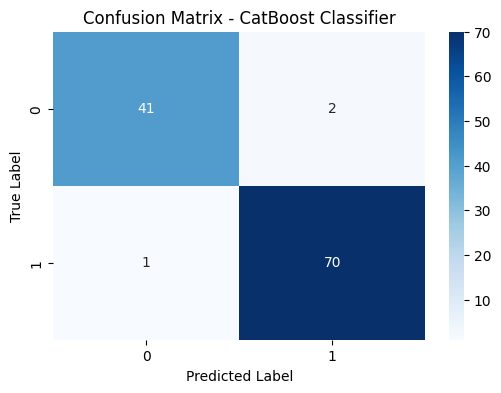

In [6]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    verbose=0
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

In [8]:
# ---------------------------------------------------------
# Loan Default Prediction Pipeline using Boosting Techniques
# ---------------------------------------------------------

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# -----------------------------
# 1. Generate Synthetic Dataset
# -----------------------------
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=5000,
    n_features=15,
    n_informative=10,
    n_classes=2,
    weights=[0.85, 0.15],   # imbalanced
    random_state=42
)

data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(15)])
data["default"] = y

# Separate features and target
X = data.drop("default", axis=1)
y = data["default"]

numeric_cols = X.select_dtypes(include=['int64', 'float64', 'float32']).columns
categorical_cols = []  # Synthetic data has no categorical features

# --------------------------------------------------------
# 2. Preprocessing Pipelines for numeric + categorical data
# --------------------------------------------------------
numeric_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transform, numeric_cols)
    ],
    remainder="drop"
)

# ------------------------------
# 3. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ------------------------------
# 4. Handle Imbalance Using SMOTE
# ------------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# ------------------------------
# 5A. Model 1 — XGBoost Pipeline
# ------------------------------
xgb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ))
])

# Hyperparameter tuning
xgb_params = {
    "clf__learning_rate": [0.01, 0.1],
    "clf__max_depth": [3, 5],
    "clf__n_estimators": [100, 200]
}

grid_xgb = GridSearchCV(xgb_model, xgb_params, cv=3, scoring="roc_auc")
grid_xgb.fit(X_train_res, y_train_res)

print("\nBest XGBoost Params:", grid_xgb.best_params_)

# Predictions
xgb_pred = grid_xgb.predict(X_test)
xgb_proba = grid_xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report:\n")
print(classification_report(y_test, xgb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_proba))

# ------------------------------
# 5B. Model 2 — CatBoost
# ------------------------------
cat_model = CatBoostClassifier(
    loss_function="Logloss",
    random_seed=42,
    verbose=False
)

# CatBoost handles missing + categorical automatically
cat_model.fit(X_train_res, y_train_res)

cat_pred = cat_model.predict(X_test)
cat_proba = cat_model.predict_proba(X_test)[:, 1]

print("\nCatBoost Classification Report:\n")
print(classification_report(y_test, cat_pred))
print("ROC AUC Score:", roc_auc_score(y_test, cat_proba))

# ------------------------------
# 6. Confusion Matrix
# ------------------------------
print("\nConfusion Matrix (CatBoost):")
print(confusion_matrix(y_test, cat_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:37:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:37:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:37:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:37:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:37:32] WARNING: /w


Best XGBoost Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1056
           1       0.90      0.88      0.89       194

    accuracy                           0.97      1250
   macro avg       0.94      0.93      0.94      1250
weighted avg       0.97      0.97      0.97      1250

ROC AUC Score: 0.9718496173070916

CatBoost Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1056
           1       0.93      0.89      0.91       194

    accuracy                           0.97      1250
   macro avg       0.95      0.94      0.95      1250
weighted avg       0.97      0.97      0.97      1250

ROC AUC Score: 0.9776485863792566

Confusion Matrix (CatBoost):
[[1042   14]
 [  21  173]]
